# Семинар 4: элементы стохастического анализа

Используя различные типы сходимости ("почти наверное", в среднем квадратичном, по вероятности, по распределению), можно ввести стохастические аналоги **непрерывности**, **дифференцируемости** и **интегрируемости**. Мы в основном будем пользоваться определениями, основанными на сходимости в среднем квадратичном.

Пользуясь связью потраекторного интеграла и интеграла Римана в среднем квадратичном, промоделируем следующий случайный процесс:
$$
    X_t = \int\limits_0^t W_s \, ds
$$

In [1]:
import numpy as np
import pandas as pd

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function
from utils.processes import generate_wiener

In [5]:
def generate_wiener_integral(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций интеграла винеровского процесса правильным методом.
    """
    
    T = np.sort(T)
    assert T[0] >= 0.0
    
    # Винеровский процесс
    realizations = generate_wiener(T, realizations_number)
        
    # Воспользуемся формулой трапеций.
    dT = T[1:] - T[:-1]
    realizations[:,1:] = np.cumsum(0.5 * (realizations[:,1:] + realizations[:,:-1]) * dT, axis=1)
    realizations[:,0] = 0.0
    
    return realizations

In [6]:
T_wiener_integral = np.linspace(0.0, 10.0, 100)
wiener_integral = generate_wiener_integral(T_wiener_integral, realizations_number=10)

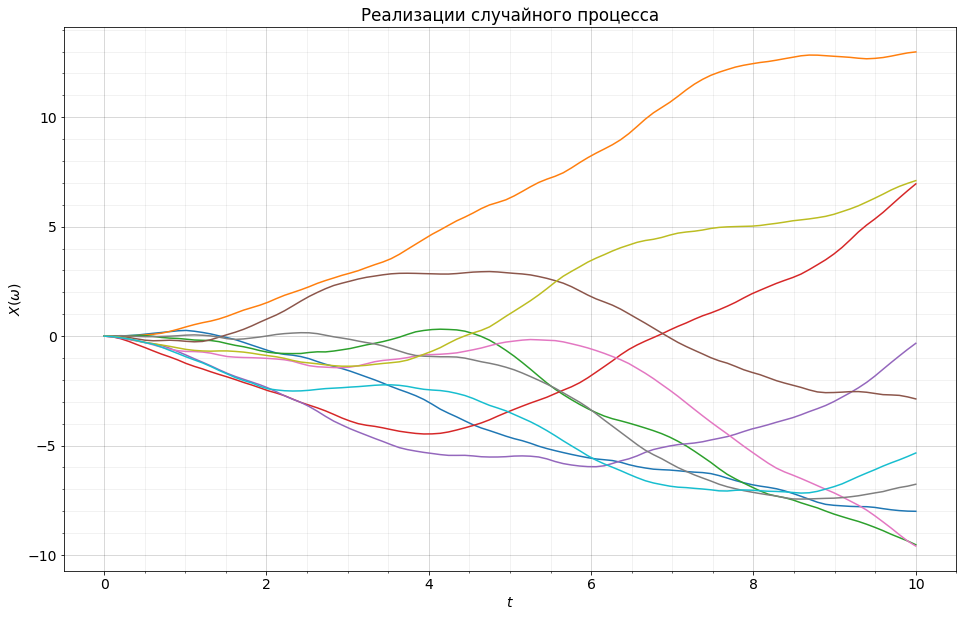

In [7]:
plot_realizations(T_wiener_integral, wiener_integral)